## Prototypicality

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy import spatial  
from scipy.stats import pearsonr

Data adapted from Leuven Concept Database (De Deyne et al., 2008). 

In [3]:
with open("data-prototypicality.pickle", "rb") as f:
    birdnames, F, goodness, features = pickle.load(f) 

Construct a simple cognitive model that reproduces human judgments of prototypicality about birds, to replicate the seminal experiments performed by Rosch.

In [4]:
# F has 253 arrays, which map the ratings for each of the 23 birds
prototype = np.nanmean(F, axis=1) # find the mean for each feature where a value exists and store it as a 253-d vector

In [5]:
# Calculate Euclidean distance of each bird to the prototype feature vector. 
bird_distances = np.zeros(len(birdnames))
for i in range(len(birdnames)): # iterate over all birds
    bird_vector = F[:, i] # find the feature vector for this bird
    bird_distances[i] = spatial.distance.euclidean(prototype, bird_vector) # store the distance in the new array

In [6]:
def mypearsonr(a,b):
    # a generic function that calculates Pearson correlation between two arrays `a` and `b`. 
    mean_a, mean_b = np.nanmean(a), np.nanmean(b) # compute means for both arrays
    mean_diff_a, mean_diff_b = np.subtract(a, mean_a), np.subtract(b, mean_b) # subtract each item from the mean
    cov = np.sum(np.multiply(mean_diff_a, mean_diff_b)) # multiply the mean differences and sum over the resulting array
    # get the denominator by multiplying the rooted, squared sums of mean differences
    denom  = (np.sum(mean_diff_a ** 2) ** 0.5) * (np.sum(mean_diff_b ** 2) ** 0.5)
    return cov/denom

In [7]:
# Calculate and report the Pearson correlation between empirical ratings in "goodness" and distances of birds to prototype.
my_corr = mypearsonr(goodness, bird_distances) # correlation between goodness and euclidean distance to the prototype
#  actual_corr = pearsonr(goodness, bird_distances)[0] # the actual r value for testing
print("Correlation between the Goodness and Euclidean Distance to Prototype: ", my_corr)

Correlation between the Goodness and Euclidean Distance to Prototype:  0.5799918509622478


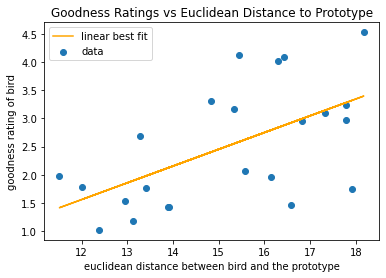

In [8]:
# Scatter-plot "goodness" ratings (y-axis) against distances of birds to prototype (x-axis)
# Generate a scatter plot with labels
plt.scatter(bird_distances, goodness, label='data')
plt.title('Goodness Ratings vs Euclidean Distance to Prototype')
plt.xlabel('euclidean distance between bird and the prototype')
plt.ylabel('goodness rating of bird')

# Find line of best fit (linear)
slope, intercept = np.polyfit(bird_distances, goodness, 1)
fitted_line = slope*bird_distances + intercept
plt.plot(bird_distances, fitted_line, label='linear best fit', color='orange')

plt.legend()
plt.show()

In [9]:
# Improvements: 

# The simplest way to improve the correlation is to improve the prototypical distance calculation!
# The Euclidean distance takes into account the magnitude (no. of ratings) of vectors but not their direction
# Vectors in a similar direction have more features in common, which could mean a better prototype correlation in this case

# The Cosine Similarity takes into account the direction, but not the magnitude since it is normalized. Therefore, it may 
# have a better correlation with the 'goodness' ratings
# I consulted this when researching ways to improve the distance: https://en.wikipedia.org/wiki/Cosine_similarity 

# We can get the Cosine Similarity from each bird to the prototype feature vector, just like the Euclidean distance earlier!
bird_distances_cosine = np.zeros(len(birdnames))
for i in range(len(birdnames)): # iterate over all birds
    bird_vector = F[:, i] # find the feature vector for each bird
    bird_distances_cosine[i] = spatial.distance.cosine(prototype, bird_vector) # store the similarity in the new array

# Now we can see its correlation with the 'goodness' ratings:
print("Correlation between the Goodness and Euclidean Distance to Prototype: ", my_corr)
print("Correlation between the Goodness and Cosine Similarity to Prototype: ", mypearsonr(goodness, bird_distances_cosine))

Correlation between the Goodness and Euclidean Distance to Prototype:  0.5799918509622478
Correlation between the Goodness and Cosine Similarity to Prototype:  0.6528896428203071


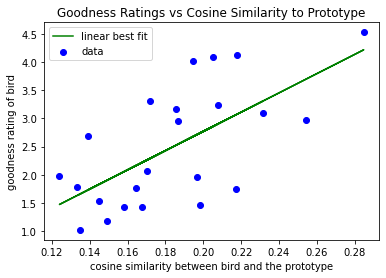

In [10]:
# Therefore, the correlation with the Cosine Similarity is higher!
# To further justify the benefit of this approach, we can plot the data points and visualize the correlation
# Generate a scatter plot with labels
plt.scatter(bird_distances_cosine, goodness, label='data', color='blue')
plt.title('Goodness Ratings vs Cosine Similarity to Prototype')
plt.xlabel('cosine similarity between bird and the prototype')
plt.ylabel('goodness rating of bird')

# Find line of best fit (linear)
slope, intercept = np.polyfit(bird_distances_cosine, goodness, 1)
fitted_line = slope*bird_distances_cosine + intercept
plt.plot(bird_distances_cosine, fitted_line, label='linear best fit', color='green')

plt.legend()
plt.show()
# From the plot we can see that the points seem to be more clustered around the linear fit line, suggesting a higher
# correlation